In [33]:
#!/usr/bin/env python3
# What: this python script was generated manually by Steven Elmlinger in February 2019

# Why: Convert all ELAN (.eaf) files in a directory to csv files

#
#
# step 1: load packages
#
#

import glob     # Import glob to easily loop over files
import pympi    # Import pympi to work with elan files
import os
import pprint as pp
import pandas as pd
import numpy as np

#
#
# step 2: load data
#
#

# subject list

'''
Enter in all of the subject IDs into the variable below, comma separated like the commented out example below.
'''

subjectarray = np.array([1, 10, 18, 21, 22, 23, 52, 57, 59, 60, 61, 64, 65, 1001, 1002, 1004, 1005, 1006, 1007])


# Define variables
corpus_root = 'eaf' # this is the folder name containing all eaf files
ort_tier_names = ['Caregiver voc', 'Infant voc'] # this is the tier name, do one tier at a time, and then append
directory = os.fsencode('{}/eaf/'.format(corpus_root))

#
#
# step 3: Initialize aggregator
#
#

columns = ['sub', 'onset', 'offset', 'cat', 'tier']
output = pd.DataFrame(columns=columns)



for a in range(len(subjectarray)):
    sub = subjectarray[a]
#     print(sub)
    flag = -1
    # Loop over all elan files the corpusroot subdirectory called eaf
    for file_path in glob.glob('{}/*.eaf'.format(corpus_root)):
        # Initialize the elan file
        flag = flag+1
        filename = os.path.basename(file_path)  #os.listdir(directory)[flag
        if filename == '.DS_Store':
            os.remove(file_path)  #os.path.join(directory.decode('utf-8'), filename.decode('utf-8')))
            break
        file = os.fsdecode(filename)
        print(file)

           
        if file == "S%d.eaf" % sub:
            # if file == "%d reliability subject.eaf" % sub:
            eafob = pympi.Elan.Eaf(file_path)
            # Loop over all the defined tiers that contain orthography
            for ort_tier in ort_tier_names:
                # If the tier is not present in the elan file spew an error and
                # continue. This is done to avoid possible KeyErrors
                # If the tier is present we can loop through the annotation data
                counter = -1
                all_utt = pd.DataFrame(columns=columns)
                for annotation in eafob.get_annotation_data_for_tier(ort_tier):
                    # We are only interested in the utterance
                    counter = counter+1
                    all_utt.loc[counter, 'sub'] = sub
                    all_utt.loc[counter, 'onset'] = annotation[0]/1000
                    all_utt.loc[counter, 'offset'] = annotation[1]/1000
                    all_utt.loc[counter, 'cat'] = annotation[2]
                    all_utt.loc[counter, 'tier'] = ort_tier
                output = output._append(all_utt)
#                 print(output)
            output = output.sort_values(['sub','onset'], ascending = [True,True])
        print(output)
#
#
# step 4: output individual .csv files
#
#

output.to_csv('tt_ab.csv',index = False, header = True)


S57.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S52.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1006.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1007.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S21.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S23.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1005.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1004.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S22.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1001.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1002.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S18.eaf
Empty DataFrame
Columns: [sub, onset, offset, cat, tier]
Index: []
S1.eaf
    sub    onset   offset                                                cat  \
0

    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..   ..      ...      ...                                                ...   
175  18  576.473  577.939                       di che colore è questo? (QE)   
176  18  579.065    580.4                      questa di che colore è? ( - )   
177  18  582.285  583.287                            di che colore è?\t( - )   
178  18  584.856   586.26                         non rispondi a mamma? (QA)   
25   18  665.843  667.242                                                      

              tier  
0    Caregiver voc

    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..   ..      ...      ...                                                ...   
142  23  657.211   658.75                                    eh ancora\t(CW)   
186  23  658.785  660.511                              sì sì va bene dai (C)   
143  23   659.92  660.311                                                xxx   
187  23  676.745  677.943                             che matta sei, (AL RO)   
188  23  678.599  679.203                                       lo sai? (QO)   

              tier  
0    Caregiver voc

    sub    onset   offset                                                cat  \
0     1    0.783    1.696                               questi piattini (RE)   
1     1    1.696    2.601                              mescoli la pappa (DA)   
2     1    2.603    4.607  e gliene dai un pochino alla bambolina forse? ...   
0     1    4.715    5.092                                             sì (C)   
3     1    5.697     6.31                                          così. (C)   
..   ..      ...      ...                                                ...   
189  60  626.753  630.264  guarda dove c’ho il piattino, guarda dove c’ho...   
48   60  630.593  631.038                                                xxx   
190  60  631.037  632.441                      sopra la testa guardami (DA)    
191  60  632.445  636.049  guardami sui capelli, ohi dove ce li ho i cape...   
192  60  636.755  640.264  guarda un po’ i capelli di mamma, Lorenzo (DA ...   

              tier  
0    Caregiver voc

      sub    onset   offset  \
0       1    0.783    1.696   
1       1    1.696    2.601   
2       1    2.603    4.607   
0       1    4.715    5.092   
3       1    5.697     6.31   
..    ...      ...      ...   
146  1001  643.144  644.196   
147  1001  646.604  647.599   
148  1001  649.294  652.459   
32   1001  652.458  653.106   
149  1001  653.541  654.483   

                                                   cat           tier  
0                                 questi piattini (RE)  Caregiver voc  
1                                mescoli la pappa (DA)  Caregiver voc  
2    e gliene dai un pochino alla bambolina forse? ...  Caregiver voc  
0                                               sì (C)     Infant voc  
3                                            così. (C)  Caregiver voc  
..                                                 ...            ...  
146                                        Ettore (NC)  Caregiver voc  
147                                        Ettore (

S57.eaf
      sub    onset   offset  \
0       1    0.783    1.696   
1       1    1.696    2.601   
2       1    2.603    4.607   
0       1    4.715    5.092   
3       1    5.697     6.31   
..    ...      ...      ...   
138  1005  656.094  657.505   
91   1005  657.416  657.959   
139  1005  658.101  659.011   
92   1005  659.347  661.516   
140  1005  665.186  670.803   

                                                   cat           tier  
0                                 questi piattini (RE)  Caregiver voc  
1                                mescoli la pappa (DA)  Caregiver voc  
2    e gliene dai un pochino alla bambolina forse? ...  Caregiver voc  
0                                               sì (C)     Infant voc  
3                                            così. (C)  Caregiver voc  
..                                                 ...            ...  
138                              E beviamo sempre? (W)  Caregiver voc  
91                                         

In [34]:
data = pd.read_csv('tt_ab.csv')
data.head(10)
print(data)

       sub    onset   offset  \
0        1    0.783    1.696   
1        1    1.696    2.601   
2        1    2.603    4.607   
3        1    4.715    5.092   
4        1    5.697    6.310   
...    ...      ...      ...   
4382  1007  577.943  579.005   
4383  1007  579.556  580.081   
4384  1007  580.669  581.231   
4385  1007  581.509  583.472   
4386  1007  584.616  585.626   

                                                    cat           tier  
0                                  questi piattini (RE)  Caregiver voc  
1                                 mescoli la pappa (DA)  Caregiver voc  
2     e gliene dai un pochino alla bambolina forse? ...  Caregiver voc  
3                                                sì (C)     Infant voc  
4                                             così. (C)  Caregiver voc  
...                                                 ...            ...  
4382                                                xxx  Caregiver voc  
4383                           

In [35]:
data['group'] = ''
data.loc[(data['sub'] < 50), 'group'] = 1
data.loc[(data['sub'] > 50)&(data['sub'] < 1000), 'group'] = 2
data.loc[(data['sub'] > 1000), 'group'] = 3

data.index = data.index + 1

data['latency']=''
data['latency group']=''
for i in data.index:
    if i<data.index.max():
        before, new = data._get_value(i,'offset'), data._get_value(i+1,'onset')
        oldtier, newtier = data._get_value(i,'tier'), data._get_value(i+1,'tier')
        data._set_value(i+1,'latency',new-before)
        oldsub, newsub = data._get_value(i,'sub'), data._get_value(i+1,'sub')
    
            
        if oldtier==newtier:
            data._set_value(i+1,'latency group','within person')
        elif oldtier=='Caregiver voc' and newtier=='Infant voc':
            data._set_value(i+1,'latency group','cg-infant')
        elif oldtier=='Infant voc' and newtier=='Caregiver voc':
            data._set_value(i+1,'latency group','infant-cg')
            
        if oldsub!=newsub:
            data._set_value(i+1,'latency','NaN')
            data._set_value(i+1,'latency group','NaN')
    else:
        break
            
data.to_csv('tt_output_plz.csv', index = True, header = True)


group  latency group
1                         1
       NaN                5
       cg-infant        482
       infant-cg        481
       within person    769
2      NaN                7
       cg-infant        279
       infant-cg        275
       within person    723
3      NaN                6
       cg-infant        287
       infant-cg        286
       within person    786
Name: latency, dtype: int64


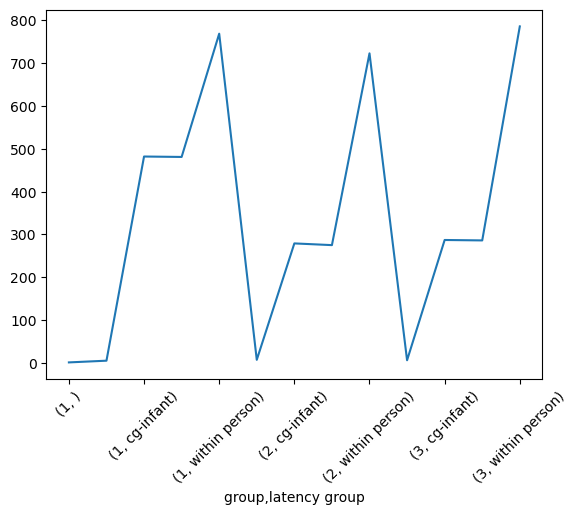

In [36]:
import seaborn
import matplotlib.pyplot as plt
 
# multiple groupby (pulse and diet both)
data2 = data.groupby(['group', 'latency group']).count()['latency']
print(data2)
 
# plot the result
data2.plot()
plt.xticks(rotation=45)
plt.show()